In [2]:
:dep plotly = { version = "=0.8.0" } # 0.8.1 has breaking changes
:dep itertools-num = "0.1.3"
:dep num = "0.4.0"

In [3]:
#![allow(warnings)]

In [4]:
use itertools_num::linspace;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Bar, Plot, Scatter};

In [5]:
use num::complex::Complex;

### Sinusoids and complex numbers in the discrete domain

Sinusoids can be expressed in real numbers:

$$
\begin{align*}
y(n) = A \sin (\omega n T + \phi) && \omega = \text{frequency in radians/sec} = 2 \pi f, T = \frac{1}{f_s}
\end{align*}
$$

Sinusoids can also be expressed in complex numbers:

$$
\begin{align*}
y(n) = A e ^ {j (\omega n T + \phi)} = A \cos (\omega n T + \phi) + j A \sin (\omega n T + \phi)
\end{align*}
$$


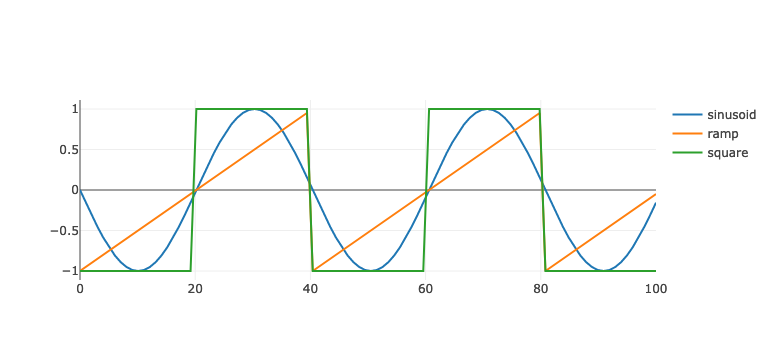

In [75]:
use core::f32::consts::PI;

/// fs:  samplerate
/// f:   frequency in hz
/// phi: starting phase
/// t:   number of samples
fn sinusoid(fs: f32, f: f32, phi: f32, t: usize) -> Vec<f32> {
    let T = 1. / fs;
    let w = 2. * PI * f;
    let mut ys = vec![0.0; t];
    
    for (x, y) in ys.iter_mut().enumerate() {
        let x = x as f32;
        *y = (w * x * T + phi).cos();
    } 
    ys
}

/// fs:  samplerate
/// f:   frequency in hz
/// phi: starting phase
/// t:   number of samples
fn ramp(fs: f32, f: f32, phi: f32, t: usize) -> Vec<f32> {
    let T = 1. / fs;
    let phi = ((2. * phi) - PI) / (4. * PI);
    let mut ys = vec![0.0; t];
    
    for (x, y) in ys.iter_mut().enumerate() {
        let x = x as f32;
        *y = 2. * ((f * x * T + phi) % 1.) - 1.;
    } 
    ys
}

/// fs:  samplerate
/// f:   frequency in hz
/// phi: starting phase
/// t:   number of samples
fn square(fs: f32, f: f32, phi: f32, t: usize) -> Vec<f32> {
    let T = 1. / fs;
    //let w = 2. * f;
    let phi = ((2. * phi) - PI) / (4. * PI);
    let mut ys = vec![0.0; t];
    
    for (x, y) in ys.iter_mut().enumerate() {
        let x = x as f32;
        *y = num::signum(2. * ((f * x * T + phi) % 1.) - 1.);
        //*y = 2. * ((2. * f32::floor(f * x * T)) - f32::floor(w * x * T)) + 1.; // direct
        //*y = (-1_f32).powf(f32::floor(w * x * T + phi));  // indirect
    } 
    ys
}

let f = 5.;
let fs = 200.;
let phi = PI/2.;
let t = 100;
//let t = 1 * fs as usize; // number of samples
  
// plot it
let xs: Vec<f32> = linspace(0., t as f32, t).collect();
//let xs: Vec<f32> = linspace(0., t as f32 / fs, t).collect();

let ys_sinusoid = sinusoid(fs, f, phi, t);
let ys_ramp = ramp(fs, f, phi, t);
let ys_square = square(fs, f, phi, t);

let mut plot = Plot::new();
plot.add_trace(Scatter::new(xs.clone(), ys_sinusoid).mode(Mode::Lines).name("sinusoid"));
plot.add_trace(Scatter::new(xs.clone(), ys_ramp).mode(Mode::Lines).name("ramp"));
plot.add_trace(Scatter::new(xs.clone(), ys_square).mode(Mode::Lines).name("square"));

plot.set_layout(Layout::new().height(200));
plot.lab_display();